# aSPEM Experiment : analysis


Test de différtentes pentes $k$ pour la relation entre $p_bet$ et $\hat{p}$


In [1]:
%run ../0_parameters.ipynb


WELCOME



In [2]:
import glob
import bayesianchangepoint as bcp

In [3]:
from aSPEM import Analysis
e = Analysis(name_file_fit='fct_velocity_sigmo')

In [4]:
def P_hat_vs_P_bet(nb_trial=600, pause=True) :
      
    Full = e.Full_list(modes_bcp=[])
    
    SUJETS = list(set(Full.sujet))
    list_h = np.linspace(0.002, 0.5, 5)
    
    if nb_trial==200 :
        fig, ax = plt.subplots(len(SUJETS),5,figsize=(5*5,len(SUJETS)*3*5))
        plt.subplots_adjust(wspace=0.3, hspace=0.2)
        import matplotlib.gridspec as gridspec
    else :
        fig, ax = plt.subplots(len(SUJETS),5,figsize=(5*5,len(SUJETS)*5))
    
    
    modes_bcp = 'mean'
    list_h = np.linspace(0.002, 0.5, 5)

    for n_s, s in enumerate(SUJETS):
        print(s, end=' ')

        bet = Full['results'][Full.sujet==s].values.tolist()
        x = np.array(Full['bino'][Full.sujet==s].values.tolist())
        
        for n_h, h in enumerate(list_h) :
            
            if nb_trial==600 :
                if pause is False :
                    p_bar, r_bar, beliefs = bcp.inference(x, h=h, p0=.5, r0=1.)
                    p_hat, r_hat = bcp.readout(p_bar, r_bar, beliefs, mode=modes_bcp, p0=.5, fixed_window_size=40)
                else :
                    p_hat = np.zeros(600)
                    liste = np.arange(0, 601, 50)
                    for a in range(len(liste)-1) :
                        p_bar, r_bar, beliefs = bcp.inference(x[liste[a]:liste[a+1]], h=h, p0=.5, r0=1.)
                        p_hat_p, r_hat = bcp.readout(p_bar, r_bar, beliefs, mode=modes_bcp, p0=.5, fixed_window_size=40)
                        p_hat[liste[a]:liste[a+1]] = p_hat_p
                ax[n_s][n_h].scatter(p_hat, bet, c='k')
                ax[n_s][n_h].set_xlabel('$p_{hat}$', fontsize=20)
                ax[n_s][n_h].set_ylabel('bet', fontsize=20)
                if n_s==0: ax[n_s][n_h].set_title('h = %s'%h, fontsize=20)
                if n_h==0: ax[n_s][n_h].set_ylabel('%s\n\nbet'%(s), fontsize=20)

            if nb_trial==200 :
                color=['k', 'r', 'g']
                gs = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=ax[n_s][n_h], hspace=0.1)
                for d, c in enumerate(range(0, 3*200-150, 200)) :
                    ax_b = plt.subplot(gs[d])
                    if pause is False :
                        p_bar, r_bar, beliefs = bcp.inference(x[c:c+200], h=h, p0=.5, r0=1.)
                        p_hat_200, r_hat = bcp.readout(p_bar, r_bar, beliefs, mode=modes_bcp, p0=.5, fixed_window_size=40)
                    else :
                        x_200, p_hat_200 = x[c:c+200], np.zeros(200)
                        liste = [0, 50, 100, 150, 200]
                        for a in range(len(liste)-1) :
                            p_bar, r_bar, beliefs = bcp.inference(x_200[liste[a]:liste[a+1]], h=h, p0=.5, r0=1.)
                            p_hat_p, r_hat = bcp.readout(p_bar, r_bar, beliefs, mode=modes_bcp, p0=.5, fixed_window_size=40)
                            p_hat_200[liste[a]:liste[a+1]] = p_hat_p
                    ax_b.scatter(p_hat_200, bet[c:c+200], c=color[d])
                    ax_b.set_xlabel('$p_{hat}$', fontsize=20)
                    ax_b.set_ylabel('bet', fontsize=20)
                    if d==0: ax_b.set_title('h = %s'%h, fontsize=20)
                    if n_h==0: ax_b.set_ylabel('%s\nblock %s\nbet'%(s, d), fontsize=20)
                    
    if nb_trial==600 : plt.tight_layout()

YK OP BMC DC AM CS RS SR TN IP LB FM 

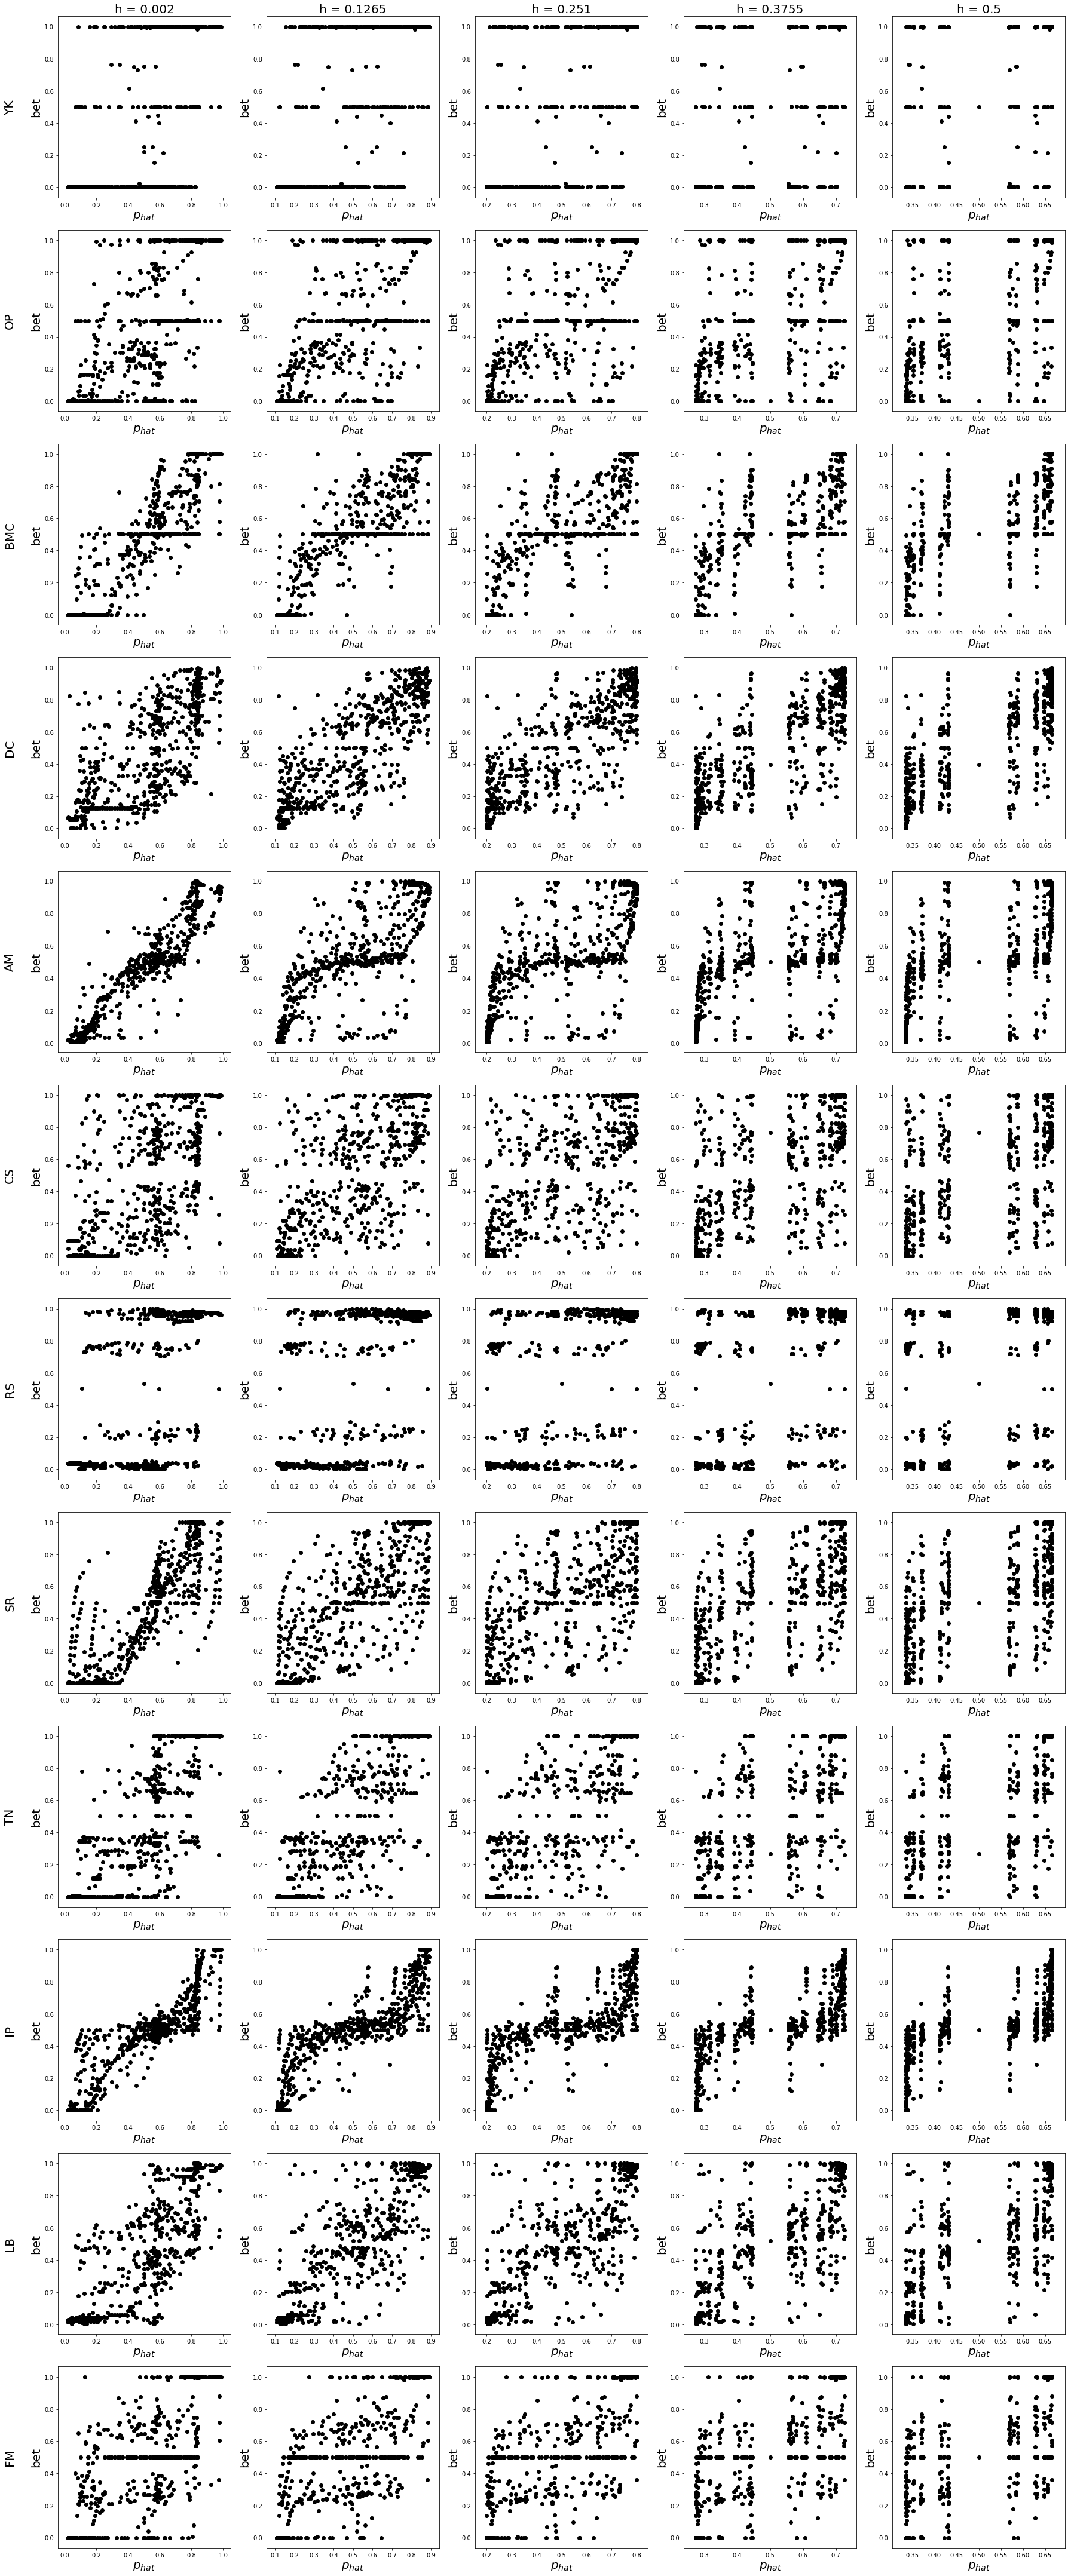

In [5]:
P_hat_vs_P_bet(nb_trial=600, pause=False)

YK OP BMC DC AM CS RS SR TN IP LB FM 

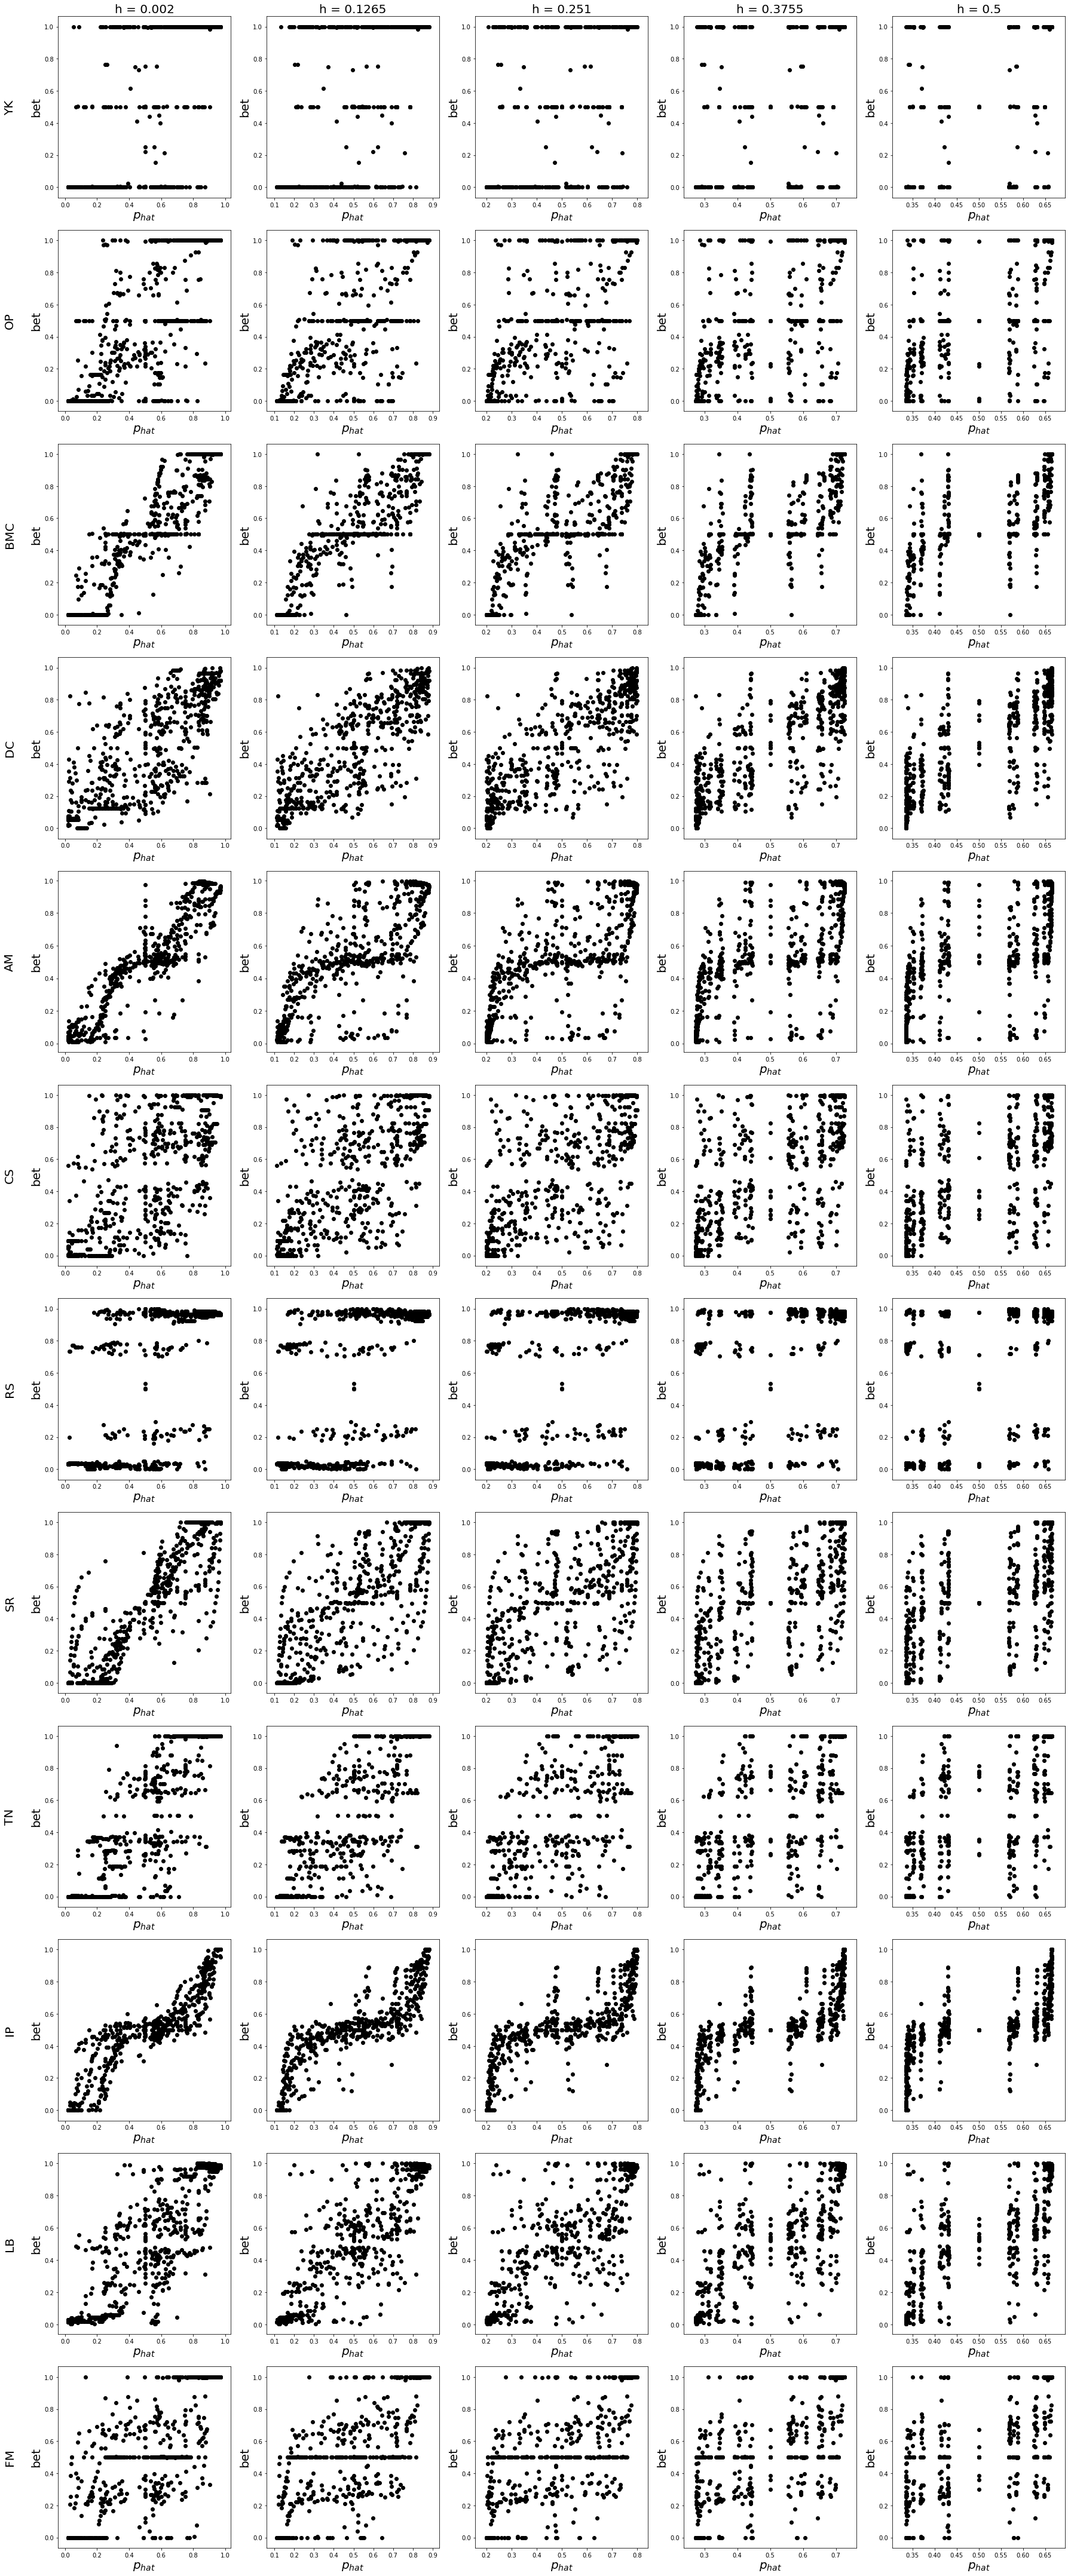

In [6]:
P_hat_vs_P_bet(nb_trial=600, pause=True)

YK OP BMC DC AM CS RS SR TN IP LB FM 

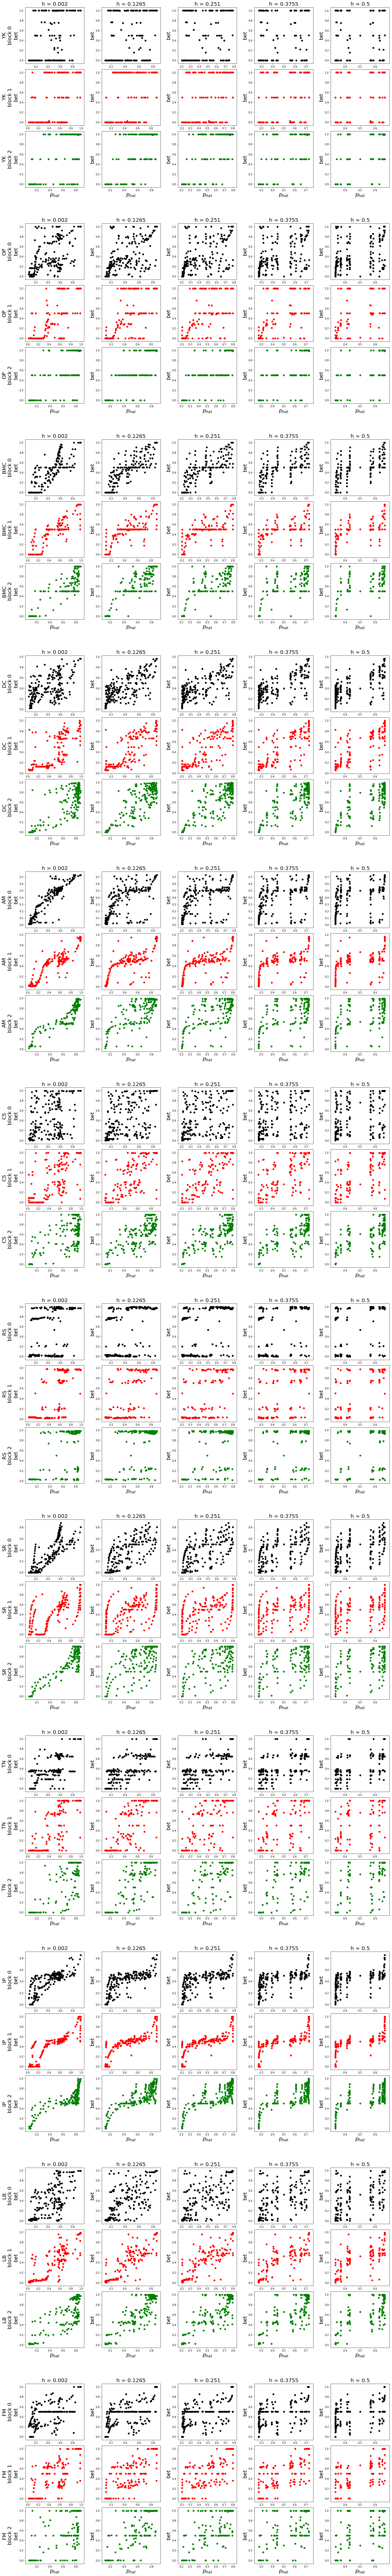

In [7]:
P_hat_vs_P_bet(nb_trial=200, pause=False)

YK OP BMC DC AM CS RS SR TN IP LB FM 

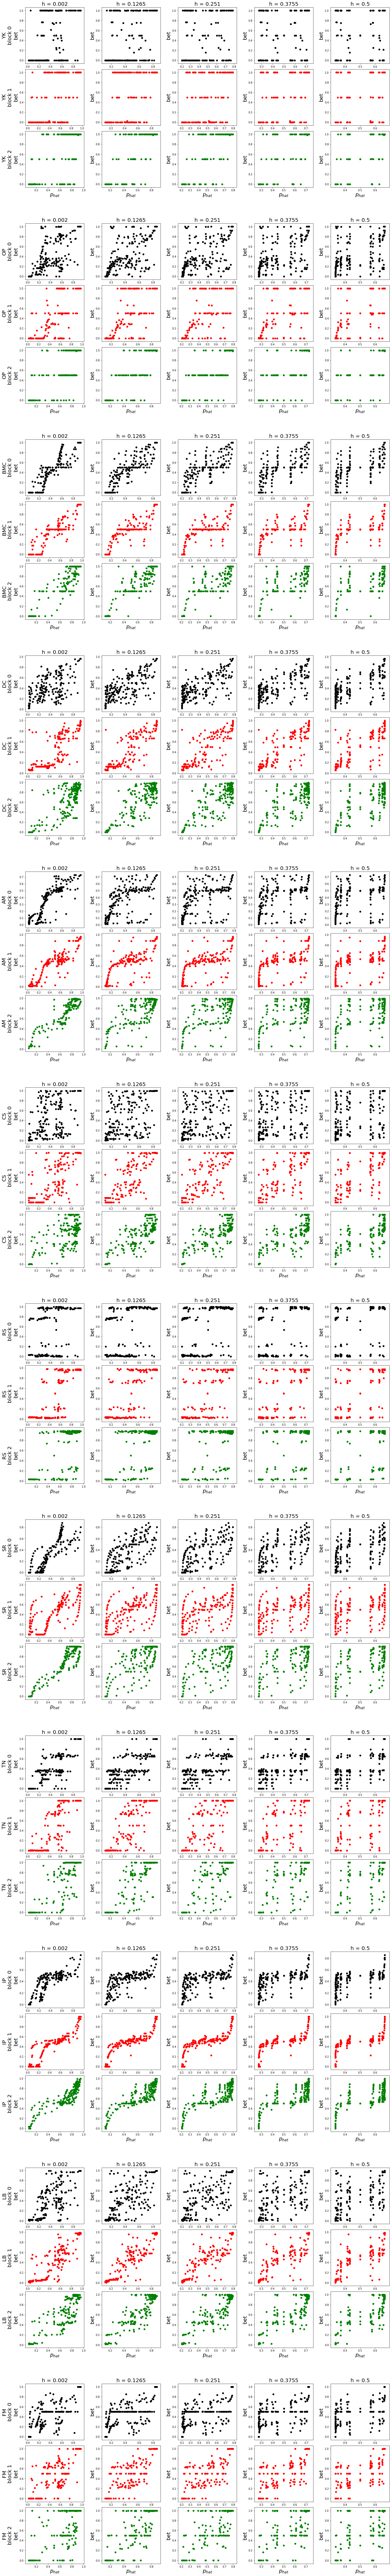

In [8]:
P_hat_vs_P_bet(nb_trial=200, pause=True)